In [1]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import tree as sktree

In [2]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")

### Decision trees

Decision trees are a simple ML model that we can use for the regression task of predicting the score of some student in an assessment.
This model should be able to deal with the non-linear relationship between the features and the target, thus achieving better results compared to linear regression. However, it might be prone to overfitting.

In [3]:
#using the scikit-learn implementation of the model
from sklearn.tree import DecisionTreeRegressor

min_samples_leaf = 15 #minimum number of samples required in a leaf -> may smooth the model
min_samples_split = 10 #minimum number of samples to split an internal node

decTree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)

decTree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=15, min_samples_split=10)

We evaluate the model by considering the RMSE error and the R2 score.

In [4]:
y_pred = decTree.predict(X_test)
y_pred_train = decTree.predict(X_train)

RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
R2 = metrics.r2_score(y_test, y_pred)

RMSE_train = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
R2_train = metrics.r2_score(y_train, y_pred_train)

In [5]:
print("RMSE: "+str(RMSE))
print("R2: "+str(R2))

print("RMSE for training: "+str(RMSE_train))
print("R2 for training: "+str(R2_train))

RMSE: 16.65055203757405
R2: 0.20733407733606657
RMSE for training: 13.255015338676076
R2 for training: 0.5021820895524856


We can see that the model loses some accuracy on the test set compared to the training set, because it tends to overfit a little. However, it reaches better performances than linear models, because of the non-linearity of the data distribution.

Let's see if the performance can get any better by experimenting with different values for *min_sample_leaf* and *min_sample_split*.

In [6]:
min_leaf = 5
max_leaf = 50
min_sample_leaf_int = range(min_leaf, max_leaf+1, 5)
min_split = 5
max_split = 50
min_sample_split_int = range(min_split, max_split+1, 5)

results_RMSE = np.empty((len(min_sample_leaf_int), len(min_sample_split_int)))
results_R2 = np.empty((len(min_sample_leaf_int), len(min_sample_split_int)))

i, j = 0, 0
for x in min_sample_leaf_int:
    j = 0
    for y in min_sample_split_int:

        print("Trying with min_sample_leaf = "+str(x)+", min_sample_split = "+str(y))

        tree = DecisionTreeRegressor(min_samples_leaf=x, min_samples_split=y)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        results_RMSE[i,j] = metrics.mean_squared_error(y_test, y_pred, squared=False)
        results_R2[i,j] = metrics.r2_score(y_test, y_pred)
        
        j +=1
    i += 1


Trying with min_sample_leaf = 5, min_sample_split = 5
Trying with min_sample_leaf = 5, min_sample_split = 10
Trying with min_sample_leaf = 5, min_sample_split = 15
Trying with min_sample_leaf = 5, min_sample_split = 20
Trying with min_sample_leaf = 5, min_sample_split = 25
Trying with min_sample_leaf = 5, min_sample_split = 30
Trying with min_sample_leaf = 5, min_sample_split = 35
Trying with min_sample_leaf = 5, min_sample_split = 40
Trying with min_sample_leaf = 5, min_sample_split = 45
Trying with min_sample_leaf = 5, min_sample_split = 50
Trying with min_sample_leaf = 10, min_sample_split = 5
Trying with min_sample_leaf = 10, min_sample_split = 10
Trying with min_sample_leaf = 10, min_sample_split = 15
Trying with min_sample_leaf = 10, min_sample_split = 20
Trying with min_sample_leaf = 10, min_sample_split = 25
Trying with min_sample_leaf = 10, min_sample_split = 30
Trying with min_sample_leaf = 10, min_sample_split = 35
Trying with min_sample_leaf = 10, min_sample_split = 40
Tryi

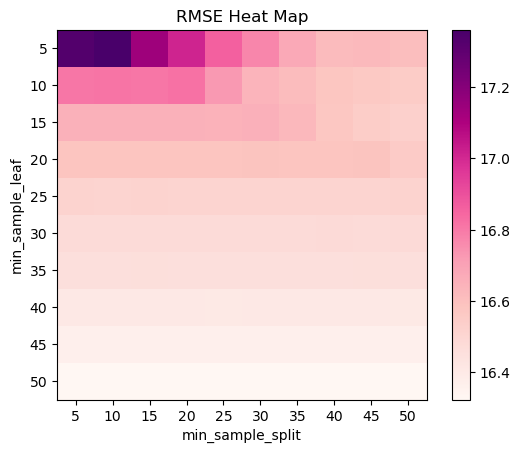

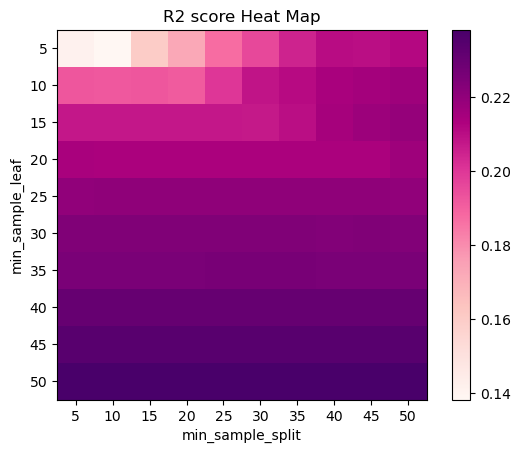

In [7]:
xlabs = min_sample_split_int
ylabs = min_sample_leaf_int

#Graph for RMSE

figure, ax = plt.subplots()

# Function to show the heat map
plt.imshow(results_RMSE , cmap = 'RdPu')
  
# Adding details to the plot
plt.title( "RMSE Heat Map" )
plt.xlabel('min_sample_split')
plt.ylabel('min_sample_leaf')

ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Adding a color bar to the plot
plt.colorbar()

# Displaying the plot
plt.show()

#Graph for R2 score

figure, ax = plt.subplots()

# Function to show the heat map
plt.imshow(results_R2 , cmap = 'RdPu')
  
# Adding details to the plot
plt.title( "R2 score Heat Map" )
plt.xlabel('min_sample_split')
plt.ylabel('min_sample_leaf')

ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Adding a color bar to the plot
plt.colorbar()

# Displaying the plot
plt.show()

By the pictures, we understand that the value of *min_sample_split* doesn't influence the model performace as much as *min_sample_leaf*. Effectively, the latter prevails on the former, according to the specification of the Decision Tree Regressor: a split for an internal node with $n$ samples won't be allowed if it produces a leaf with $m >$ *min_sample_leaf* and $m < $ *min_sample_split*, even if $n > $ *min_sample_split*.

As we could expect, the best values of *min_sample_leaf* and *min_sample_split* according to RMSE and R2 score coincide.
They seem to be:
- *min_sample_leaf* = 45
- *min_sample_split* = 10 (other values were possible but we choose a lower one to allow splitting more often)

In [8]:
tree = DecisionTreeRegressor(min_samples_leaf=45, min_samples_split=10)
model = tree.fit(X_train, y_train)
pred = tree.predict(X_test)
pred_train = tree.predict(X_train)

RMSE = metrics.mean_squared_error(y_test, pred, squared=False)
R2 = metrics.r2_score(y_test, pred)

RMSE_train = metrics.mean_squared_error(y_train, pred_train, squared=False)
R2_train = metrics.r2_score(y_train, pred_train)

print("RMSE: "+str(RMSE))
print("R2: "+str(R2))

print("RMSE for training: "+str(RMSE_train))
print("R2 for training: "+str(R2_train))

RMSE: 16.36655008219262
R2: 0.2341438540829356
RMSE for training: 15.006406342874346
R2 for training: 0.3619371601791831


So the best performance we can get with this model is:
- RMSE = 16.27
- R2 score = 0.24

Finally, let's visualize the first levels of the corresponding decision tree to get a better understanding on what happens during the training step.

In [9]:
tree = DecisionTreeRegressor(min_samples_leaf=45, min_samples_split=10, max_depth=3)
model = tree.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = sktree.plot_tree(tree, feature_names=X_train.columns.values, filled=True)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',
       'date_registration', 'forumng_clicks', 'homepage_clicks',
       'oucontent_clicks', 'resource_clicks', 'subpage_clicks',
       'url_clicks', 'dataplus_clicks', 'glossary_clicks',
       'oucollaborate_clicks', 'quiz_clicks', 'ouelluminate_clicks',
       'sharedsubpage_clicks', 'questionnaire_clicks', 'page_clicks',
       'externalquiz_clicks', 'ouwiki_clicks', 'dualpane_clicks',
       'folder_clicks', 'repeatactivity_clicks', 'htmlactivity_clicks',
       'assessment_type', 'weight', 'submission_delay'], dtype=object) instead.

<Figure size 2500x2000 with 0 Axes>

The plot below represents the number of wrong prediction for some error values.

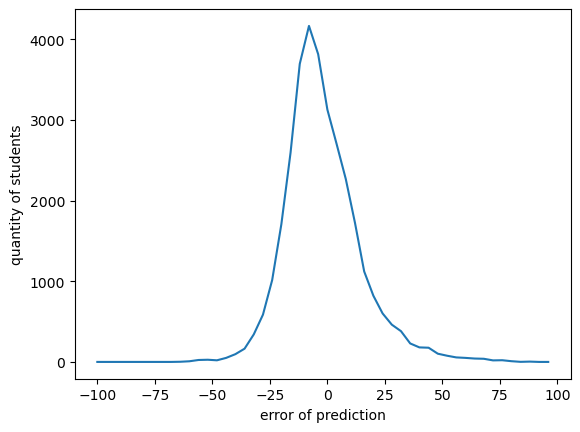

In [ ]:

intervals=50
sliceInterval= 200/intervals
quantities=np.zeros(intervals)
values=np.zeros(intervals)
y_diff=y_pred-y_test.values.flatten()

for j in range(intervals):
    quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()
    values[j]=(sliceInterval*j)-100

plt.plot(values,quantities)
plt.xlabel("error of prediction")
plt.ylabel("quantity of students")
plt.show()

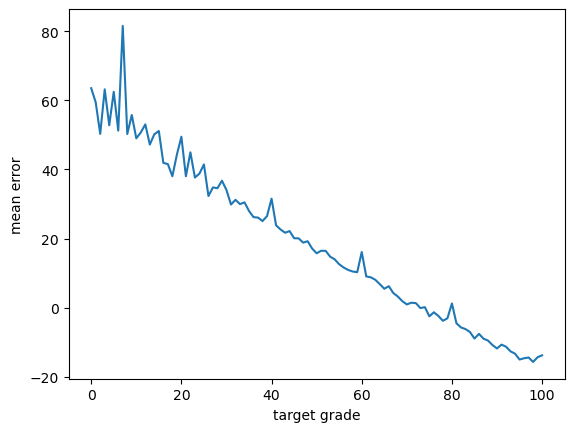

In [10]:

gradesError=np.zeros(101)
gradesErrorCount=np.zeros(101)
y_testv=y_test.values.flatten()
for i in range(len(y_testv)):
    #if(-(y_testv[i]-pred[i])>50):
    #    gradesError[int(y_testv[i])]+=1
    gradesError[int(y_testv[i])]+=(pred[i]-y_testv[i])
    gradesErrorCount[int(y_testv[i])]+=1

for i in range(len(gradesError)):
    if gradesErrorCount[i]>0:
        gradesError[i]=gradesError[i]/gradesErrorCount[i]
    else:
        gradesError[i]=0
plt.plot(range(0,101),gradesError)
plt.xlabel("target grade")
plt.ylabel("mean error")
plt.show()